<a href="https://colab.research.google.com/github/Isafon/ECE528/blob/main/ECE528_ASN2_Q3a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Q3 Part A ECE528 LA2 - Isa Fontana

In [1]:
import os
import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import image

# **Uploading file from your direcorty**
 The file you upload should be a zip folder containing your dataset.
This code below will prompt you to select and upload the zip file from your local computer into colab directory

In [2]:
# If you are using google colab, run this cell
from google.colab import files
uploaded = files.upload()

Saving WeatherDataset-Q3.zip to WeatherDataset-Q3.zip


# **Unziping the Folder in Colab**
Here you should be able to see the extracted zip folder in your colab folder directory

In [3]:
import zipfile

for filename in uploaded.keys():
    if filename.endswith('.zip'):
        zip_ref = zipfile.ZipFile(filename, 'r')
        zip_ref.extractall()
        print(f"Extracted folder correctly {filename}")
        zip_ref.close()

Extracted folder correctly WeatherDataset-Q3.zip


In [4]:
# # Define paths for the weather condition folders
weather_conditions = ['rain', 'hail', 'glaze', 'frost', 'fogsmog', 'dew',
                      'lightning', 'rainbow', 'rime', 'sandstorm', 'snow']
print(weather_conditions)

['rain', 'hail', 'glaze', 'frost', 'fogsmog', 'dew', 'lightning', 'rainbow', 'rime', 'sandstorm', 'snow']


In [5]:
# Get parent directory
parent_dir = os.getcwd()
print(parent_dir)

# List the extracted contents in your Colab ennvironment to see where the extracted folder is found at and point it to the correct path below
extracted_files = os.listdir(parent_dir)

# find the 'WeatherDataset' folder extracted in your colab directory
weather_dataset_folder = 'WeatherDataset'
if weather_dataset_folder not in extracted_files:
    raise FileNotFoundError(f"'{weather_dataset_folder}' folder not found in {parent_dir}")

weather_dataset_path = os.path.join(parent_dir, weather_dataset_folder)
print(f"WeatherDataset folder path: {weather_dataset_path}")

# # # # Define train and test folders
train_folders = [os.path.join(weather_dataset_path, condition, 'train') for condition in weather_conditions]
test_folders = [os.path.join(weather_dataset_path, condition, 'test') for condition in weather_conditions]
print(train_folders)
print(test_folders)

/content
WeatherDataset folder path: /content/WeatherDataset
['/content/WeatherDataset/rain/train', '/content/WeatherDataset/hail/train', '/content/WeatherDataset/glaze/train', '/content/WeatherDataset/frost/train', '/content/WeatherDataset/fogsmog/train', '/content/WeatherDataset/dew/train', '/content/WeatherDataset/lightning/train', '/content/WeatherDataset/rainbow/train', '/content/WeatherDataset/rime/train', '/content/WeatherDataset/sandstorm/train', '/content/WeatherDataset/snow/train']
['/content/WeatherDataset/rain/test', '/content/WeatherDataset/hail/test', '/content/WeatherDataset/glaze/test', '/content/WeatherDataset/frost/test', '/content/WeatherDataset/fogsmog/test', '/content/WeatherDataset/dew/test', '/content/WeatherDataset/lightning/test', '/content/WeatherDataset/rainbow/test', '/content/WeatherDataset/rime/test', '/content/WeatherDataset/sandstorm/test', '/content/WeatherDataset/snow/test']


Setting image size and batch size

In [6]:
IMG_SIZE = 299  # Xception expects 299x299 images
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

Helper function to load and preprocess images

In [7]:
# Function to load images from a folder and assign a label
def load_images_from_folder(folder, label_value):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
        img_array = image.img_to_array(img) / 255.0  # Rescale images to [0, 1]
        images.append(img_array)
        labels.append(label_value)
    return np.array(images), np.array(labels)

Load train and test datasets for all weather conditions

In [8]:
train_images = []
train_labels = []
test_images = []
test_labels = []

for i, folder in enumerate(train_folders):
    images, labels = load_images_from_folder(folder, i)  # Assign unique label i for each weather condition
    train_images.append(images)
    train_labels.append(labels)

for i, folder in enumerate(test_folders):
    images, labels = load_images_from_folder(folder, i)  # Same label for the test set
    test_images.append(images)
    test_labels.append(labels)

Combine the loaded images and labels for training and testing

In [9]:
train_images = np.concatenate(train_images)
train_labels = np.concatenate(train_labels)

test_images = np.concatenate(test_images)
test_labels = np.concatenate(test_labels)

Define class names

In [10]:
class_names = weather_conditions
num_classes = len(class_names)

print(f"Loaded {len(train_images)} training images and {len(test_images)} test images.")

Loaded 3368 training images and 841 test images.


### Format the Data
Use the tf.image module to format the images for the task.
Resize the images to a fixed input size, and rescale the input channels to a range of [-1,1]

In [11]:
def format_example(image, label):
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, label

### Create TensorFlow datasets and apply the format function


In [12]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
train_dataset = train_dataset.map(format_example).shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)

test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
test_dataset = test_dataset.map(format_example).batch(BATCH_SIZE)

### Inspect a batch of data

In [13]:
for image_batch, label_batch in train_dataset.take(1):
    print(f"Image batch shape: {image_batch.shape}")
    print(f"Label batch shape: {label_batch.shape}")

Image batch shape: (32, 299, 299, 3)
Label batch shape: (32,)


### Show the first Nine images and labels from the training set

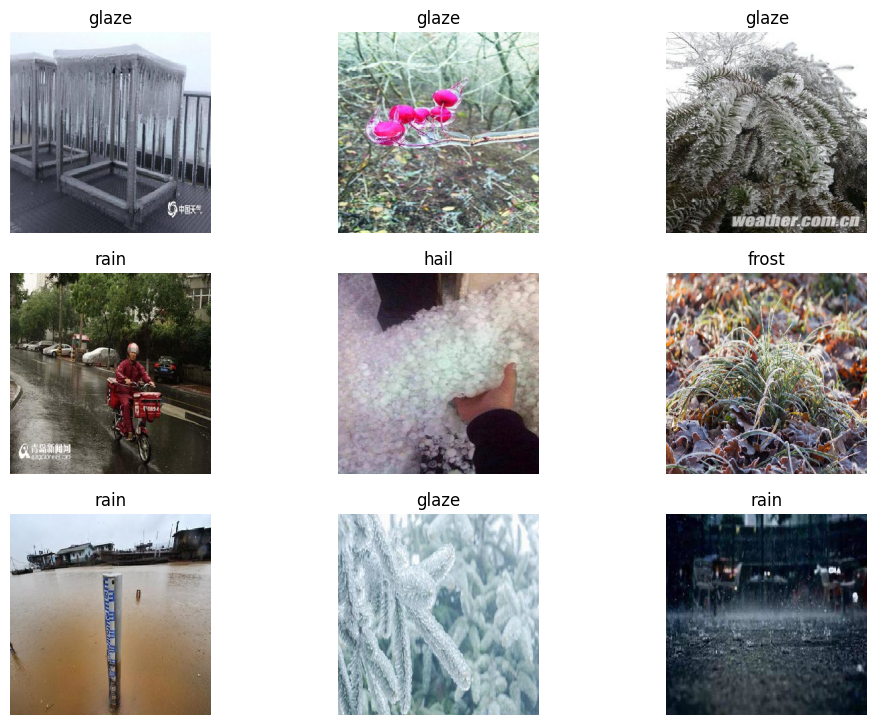

In [14]:
# Show the first Nine images in a 3x2 grid
plt.figure(figsize=(12, 12))
for i, (image, label) in enumerate(train_dataset.unbatch().take(9)):
    plt.subplot(4, 3, i + 1)

    plt.imshow(image.numpy())
    plt.title(class_names[label.numpy()])
    plt.axis("off")
plt.show()

In [15]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# Create the base model from the pre-trained Xception

base_model = keras.applications.Xception(input_shape=IMG_SHAPE,
                                                  include_top=False,
                                                  weights='imagenet',
                                                 )

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


This feature extractor converts each `299x299x3` image into a `10x10x2048` block of features. See what it does to the example batch of images:

In [16]:
# Feature extractor output shape
feature_batch = base_model(image_batch)
print(f"Feature batch shape: {feature_batch.shape}")

Feature batch shape: (32, 10, 10, 2048)


In [17]:
# Freeze the convolutional base
base_model.trainable = False

In [18]:
# Take a look at the base model architecture (Xception)
base_model.summary()

Model: "xception"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 149, 149,  │        864 │ input_layer[0][0] │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 149, 149,  │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 149, 149,  │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 147, 147,  │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 147, 147,  │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 147, 147,  │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 147, 147,  │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 147, 147,  │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 147, 147,  │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 147, 147,  │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 147, 147,  │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 74, 74,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 74, 74,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 74, 74,    │        512 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 74, 74,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 74, 74,    │          0 │ add[0][0]       

 Total params: 20,861,480 (79.58 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,861,480 (79.58 MB)

### Add a classification head

To generate predictions from the block of features, average over the spatial `5x5` spatial locations, using a `tf.keras.layers.GlobalAveragePooling2D` layer to convert the features to  a single 2048-element vector per image.

In [19]:
# Use GlobalAveragePooling2D to convert the features to a single vector per image
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(f"Feature batch after GlobalAveragePooling2D: {feature_batch_average.shape}")

Feature batch after GlobalAveragePooling2D: (32, 2048)


Apply a `tf.keras.layers.Dense` layer to convert these features into a prediction per image.

In [20]:
# Add a Dense layer to convert features into predictions
prediction_layer = tf.keras.layers.Dense(num_classes, activation='softmax')
prediction_batch = prediction_layer(feature_batch_average)
print(f"Prediction batch shape: {prediction_batch.shape}")

Prediction batch shape: (32, 11)


Now stack the feature extractor, and these two layers using a `tf.keras.Sequential` model:

In [21]:
# Stack the feature extractor and the classifier layers using Sequential model
model = tf.keras.Sequential([
    base_model,
    global_average_layer,
    prediction_layer
])

### Compile the model

You must compile the model before training it.  Since there are 102 classes, use a sparse categorical cross-entropy loss with `from_logits=True` since the model provides a linear output.

In [22]:
# Use the Adam optimizer and sparse categorical cross-entropy for classification
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ (None, 10, 10, 2048)   │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 11)             │        22,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,884,019 (79.67 MB)

 Trainable params: 22,539 (88.04 KB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [25]:
# If the skeleton used different names, alias them so the rest of the code works
if 'train_ds' in globals() and 'train_dataset' not in globals():
    train_dataset = train_ds
if 'test_ds' in globals() and 'test_dataset' not in globals():
    test_dataset = test_ds
if 'val_ds' in globals() and 'val_dataset' not in globals():
    val_dataset = val_ds

# Create a validation dataset from the training dataset if none exists
if 'val_dataset' not in globals():
    ds = train_dataset

    # one-time deterministic shuffle before splitting to avoid bias
    ds = ds.shuffle(1000, seed=0, reshuffle_each_iteration=False)

    n = tf.data.experimental.cardinality(ds).numpy()
    val_size = max(1, int(0.1 * n))

    val_dataset   = ds.take(val_size)
    train_dataset = ds.skip(val_size)

AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().prefetch(AUTOTUNE)
val_dataset   = val_dataset.cache().prefetch(AUTOTUNE)
test_dataset  = test_dataset.cache().prefetch(AUTOTUNE)

In [26]:
## PERFORM TRANSFER LEARNING AND FINE TUNING HERE
# ===== Q3(a): Transfer learning + fine-tuning on Xception =====
from tensorflow import keras

# 1) Warm-up: train the new classification head with Xception frozen
base_model.trainable = False
for l in base_model.layers:
    l.trainable = False

model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

ckpt1 = keras.callbacks.ModelCheckpoint(
    "q3a_stage1.weights.h5",
    monitor="val_accuracy",
    save_best_only=True,
    save_weights_only=True,
    mode="max",
    verbose=1,
)
early1 = keras.callbacks.EarlyStopping(
    monitor="val_accuracy", patience=3, restore_best_weights=True, mode="max", verbose=1
)

hist1 = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=8,
    callbacks=[ckpt1, early1],
    verbose=2,
)

# 2) Fine-tune: unfreeze the top of Xception and continue with a lower LR
fine_tune_at = max(0, len(base_model.layers) - 50)  # unfreeze the last ~50 layers
base_model.trainable = True
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

model.compile(
    optimizer=keras.optimizers.Adam(1e-4),  # lower LR for fine-tuning
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

ckpt2 = keras.callbacks.ModelCheckpoint(
    "q3a_stage2.weights.h5",
    monitor="val_accuracy",
    save_best_only=True,
    save_weights_only=True,
    mode="max",
    verbose=1,
)
early2 = keras.callbacks.EarlyStopping(
    monitor="val_accuracy", patience=4, restore_best_weights=True, mode="max", verbose=1
)

initial_epoch = (hist1.epoch[-1] + 1) if len(hist1.epoch) else 0
hist2 = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=20,
    initial_epoch=initial_epoch,
    callbacks=[ckpt2, early2],
    verbose=2,
)

# 3) Test evaluation (loads the best fine-tuned weights if they exist)
try:
    model.load_weights("q3a_stage2.weights.h5")
except Exception:
    pass

test_loss, test_acc = model.evaluate(test_dataset, verbose=2)
print(f"Q3(a) — Test accuracy: {test_acc:.4f}, Test loss: {test_loss:.4f}")

Epoch 1/8

Epoch 1: val_accuracy improved from -inf to 0.79062, saving model to q3a_stage1.weights.h5
96/96 - 80s - 833ms/step - accuracy: 0.6063 - loss: 1.4438 - val_accuracy: 0.7906 - val_loss: 0.9195
Epoch 2/8

Epoch 2: val_accuracy improved from 0.79062 to 0.84688, saving model to q3a_stage1.weights.h5
96/96 - 10s - 105ms/step - accuracy: 0.8100 - loss: 0.7353 - val_accuracy: 0.8469 - val_loss: 0.6690
Epoch 3/8

Epoch 3: val_accuracy improved from 0.84688 to 0.86250, saving model to q3a_stage1.weights.h5
96/96 - 10s - 106ms/step - accuracy: 0.8442 - loss: 0.5708 - val_accuracy: 0.8625 - val_loss: 0.5570
Epoch 4/8

Epoch 4: val_accuracy improved from 0.86250 to 0.87813, saving model to q3a_stage1.weights.h5
96/96 - 10s - 106ms/step - accuracy: 0.8694 - loss: 0.4840 - val_accuracy: 0.8781 - val_loss: 0.4854
Epoch 5/8

Epoch 5: val_accuracy improved from 0.87813 to 0.89688, saving model to q3a_stage1.weights.h5
96/96 - 10s - 105ms/step - accuracy: 0.8904 - loss: 0.4256 - val_accuracy:

In [27]:
### Evaluate the model on the test dataset
### Without any transfer learning, Xception achieves
### approximately 8-12% accuracy on the test dataset
results = model.evaluate(test_dataset)
print('Test loss, Test accuracy:', results)

27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - accuracy: 0.8673 - loss: 0.4205
Test loss, Test accuracy: [0.36250728368759155, 0.8822829723358154]
